# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [7]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "/Users/gaodi/Desktop/python/X/project 2/traffic_sign_classify/traffic-signs-data/train.p"
testing_file = "/Users/gaodi/Desktop/python/X/project 2/traffic_sign_classify/traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X, y = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [8]:
### Replace each question mark with the appropriate value.
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import numpy as np
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import pandas as pd
import collections
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2
import matplotlib.image as mpimg
import math
from tqdm import tqdm

import pickle
# TODO: Number of training examples
n_train = len(X)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [ ]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**1. generate new data   2. histogram equalization    3. Scale normalization within (0,1.0)

In [9]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
generate_data = 0
rgb2gray = 0
bright_aug = 0
histo_norm = 1
scale_norm = 1
zero_mean_norm = 0
EPOCHS = 50
BATCH_SIZE = 128
rate = 0.001
dropout_conv = 0.8
dropout_fc = 0.6
no_validation_split = 1

#extract 1 track at random per class for validation, yielding 1,290 samples for validation and 37,919 for training
val_index_start = []
val_index = []
label_frequency = {}
label_counter = collections.Counter(y)
for i in range(43):
    freq = label_counter[i]/len(y)*100
    label_frequency[i] = freq
track_start = range(0,label_counter[0],30)
val_index_start.append(random.choice(track_start))

for i in range(1,43):
    val_index_start.append(val_index_start[i-1]+label_counter[i])

for j in val_index_start:
    val_index.append(j)
    for k in range(29):
        val_index.append(val_index[-1]+1)

X_validation = X[val_index]
y_validation = y[val_index]
X_train = np.delete(X, val_index, axis=0)
y_train = np.delete(y, val_index, axis=0)

if no_validation_split == 1:
    X_train = X
    y_train = y


# image brightness augmentation
def augment_brightness(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1


#Generating additional data for unbalanced classes by jittering the original image
def transform_image(img,ang_range,shear_range,trans_range,brightness=0):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    if brightness == 1:
      img = augment_brightness(img)

    return img


#convert RGB2grayscale (32,32,3) to (32,32,1)
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


#histogram equalization can increase the contrast of the image
def histogram_normalize(image):
    image = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    B_value = image[:,:,2]
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    image[:,:,2] = clahe.apply(B_value)
    image = cv2.cvtColor(image,cv2.COLOR_HSV2RGB)
    return image


#Normalize data within range(-0.5,0.5)
def scale_normalize(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for grayscale image data
    x_min = 0
    x_max = 255
    a = 0.
    b = 1.
    image_data = a + (((image_data-x_min)*(b-a))/(x_max-x_min))
    return image_data

def zero_mean_normalize(image):
    image = image.astype(np.float32)
    image = image - np.mean(image)
    return image


if generate_data == 1:
    comp_ratio = 100/43
    print("Generating new data...")
    for i in tqdm(range(len(X_train))):
        image = X_train[i]
        img_label = y_train[i]
        num_gen = int(10/label_frequency[img_label]*comp_ratio)
        for i in range(num_gen):
            img = transform_image(image,20,10,5,brightness=1)
            X_train = np.append(X_train,[img],axis=0)
            y_train = np.append(y_train, img_label)
    print("Data generation done.")


if rgb2gray == 1:
    X_train_gray = np.zeros((X_train.shape[0],X_train.shape[1],X_train.shape[2],1))
    for i in range(len(X_train)):
        image = X_train[i]
        gray = grayscale(image)
        gray_3d = gray[:,:,np.newaxis]
        X_train_gray[i] = gray_3d
    X_train = X_train_gray

    X_validation_gray = np.zeros((X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1))
    for i in range(len(X_validation)):
        image = X_validation[i]
        gray = grayscale(image)
        gray_3d = gray[:,:,np.newaxis]
        X_validation_gray[i] = gray_3d
    X_validation = X_validation_gray

    X_test_gray = np.zeros((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))
    for i in range(len(X_test)):
        image = X_test[i]
        gray = grayscale(image)
        gray_3d = gray[:,:,np.newaxis]
        X_test_gray[i] = gray_3d
    X_test = X_test_gray


if bright_aug == 1:
    for i in range(len(X_train)):
        image = X_train[i]
        bright = augment_brightness(image)
        X_train[i] = bright
    for i in range(len(X_validation)):
        image = X_validation[i]
        bright = augment_brightness(image)
        X_validation[i] = bright
    for i in range(len(X_test)):
        image = X_test[i]
        bright = augment_brightness(image)
        X_test[i] = bright



if histo_norm == 1:
    for i in range(len(X_train)):
        image = X_train[i]
        histo = histogram_normalize(image)
        X_train[i] = histo
    for i in range(len(X_validation)):
        image = X_validation[i]
        histo = histogram_normalize(image)
        X_validation[i] = histo
    for i in range(len(X_test)):
        image = X_test[i]
        histo = histogram_normalize(image)
        X_test[i] = histo


if scale_norm == 1:
    X_train = scale_normalize(X_train)
    X_validation = scale_normalize(X_validation)
    X_test = scale_normalize(X_test)


if zero_mean_norm == 1:
    for i in range(len(X_train)):
        image = X_train[i]
        zero_mean = zero_mean_normalize(image)
        X_train[i] = zero_mean
    for i in range(len(X_validation)):
        image = X_validation[i]
        zero_mean = zero_mean_normalize(image)
        X_validation[i] = zero_mean
    for i in range(len(X_test)):
        image = X_test[i]
        zero_mean = zero_mean_normalize(image)
        X_test[i] = zero_mean


assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print("Given Data Set:   {} samples".format(len(X)))
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

X_train, y_train = shuffle(X_train, y_train)


Image Shape: (32, 32, 3)
Given Data Set:   39209 samples
Training Set:   39209 samples
Validation Set: 1290 samples
Test Set:       12630 samples


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** generate new data with different rotation, shear, transformation, brightness Code in the above cell

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** Based on Lenet5. 1st layer is 1x1 filter, 2nd layer is 5x5 filter, 3rd layer 1x1 filter, 4th layer 5x5 filter, 5th to 7th layers are fully connected layers

In [10]:
### Train your model here.
### Feel free to use as many code cells as needed.
def LeNet(x, keep_prob_conv, keep_prob_fc):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.    
    conv1_W_one = tf.Variable(tf.truncated_normal(shape=(1, 1, 3, 8), mean = mu, stddev = sigma))
    conv1_b_one = tf.Variable(tf.zeros(8))
    conv1_one   = tf.nn.conv2d(x, conv1_W_one, strides=[1, 1, 1, 1], padding='VALID') + conv1_b_one
    conv1_one = tf.nn.relu(conv1_one)

    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 8, 16), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(conv1_one, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1, keep_prob_conv)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')


    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W_one = tf.Variable(tf.truncated_normal(shape=(1, 1, 16, 32), mean = mu, stddev = sigma))
    conv2_b_one = tf.Variable(tf.zeros(32))
    conv2_one   = tf.nn.conv2d(conv1, conv2_W_one, strides=[1, 1, 1, 1], padding='VALID') + conv2_b_one
    conv2_one = tf.nn.relu(conv2_one)

    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 48), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(48))
    conv2   = tf.nn.conv2d(conv2_one, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2, keep_prob_conv)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1200, 800), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(800))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob_fc)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(800, 240), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(240))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob_fc)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(240, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**adam optimizer, 128 batch, 50 epochs learning rate = 0.001 with decays

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**Lenet5 is quite accurate on this project and is trained fast

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Training...

EPOCH 1 ...
learning rate: 0.001000
Loss: 1.225738
Validation Accuracy = 0.91306

EPOCH 2 ...
learning rate: 0.001000
Loss: 0.139515
Validation Accuracy = 0.94719

EPOCH 3 ...
learning rate: 0.001000
Loss: 0.059094
Validation Accuracy = 0.95455

EPOCH 4 ...
learning rate: 0.001000
Loss: 0.034444
Validation Accuracy = 0.96120

EPOCH 5 ...
learning rate: 0.001000
Loss: 0.022535
Validation Accuracy = 0.95994

EPOCH 6 ...
learning rate: 0.001000
Loss: 0.015270
Validation Accuracy = 0.96397

EPOCH 7 ...
learning rate: 0.001000
Loss: 0.011144
Validation Accuracy = 0.95907

EPOCH 8 ...
learning rate: 0.001000
Loss: 0.007895
Validation Accuracy = 0.96453

EPOCH 9 ...
learning rate: 0.001000
Loss: 0.006255
Validation Accuracy = 0.96738

EPOCH 10 ...
learning rate: 0.001000
Loss: 0.005132
Validation Accuracy = 0.96880

EPOCH 11 ...
learning rate: 0.001000
Loss: 0.004683
Validation Accuracy = 0.96548

EPOCH 12 ...
learning rate: 0.001000
Loss: 0.003787
Validation Accuracy = 0.96445



/Users/gaodi/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/gaodi/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


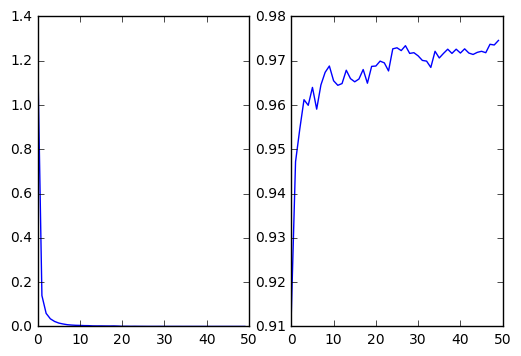

In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
if rgb2gray == 1:
    x = tf.placeholder(tf.float32, (None, 32, 32, 1))
else:
    x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob_conv = tf.placeholder(tf.float32)
keep_prob_fc = tf.placeholder(tf.float32)
decayed_rate = tf.placeholder(tf.float32)


logits = LeNet(x, keep_prob_conv, keep_prob_fc)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = decayed_rate)
training_operation = optimizer.minimize(cost)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
acc_list = []
loss_list = []

def evaluate(sess, X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob_conv: 1., keep_prob_fc: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for epc in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        total_loss = 0
        if ( epc >=20 and epc % 5 ==0):
            rate = rate * 0.75
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob_conv: dropout_conv, 
            keep_prob_fc: dropout_fc, decayed_rate: rate})
            loss = sess.run(cost, feed_dict={x: batch_x, y: batch_y, keep_prob_conv: 1., keep_prob_fc: 1.})
            total_loss += (loss * len(batch_x))
        epc_loss = total_loss/num_examples
        loss_list.append(epc_loss)
        #validation_accuracy = evaluate(sess, X_validation, y_validation)
        validation_accuracy = evaluate(sess, X_test, y_test)
        acc_list.append(validation_accuracy)
        print("EPOCH {} ...".format(epc+1))
        print('learning rate: {:>8.6f}'.format(rate))
        print('Loss: {:>8.6f}'.format(epc_loss))
        print("Validation Accuracy = {:.5f}".format(validation_accuracy))
        print()
    saver.save(sess, 'onebyone_histo')
    test_accuracy = evaluate(sess, X_test, y_test)
    print("Test Accuracy = {:.5f}".format(test_accuracy))

epoch_list = range(len(acc_list))
fig, ax = plt.subplots(nrows=1,ncols=2)
plt.subplot(1,2,1)
plt.plot(epoch_list, loss_list)
plt.subplot(1,2,2)
plt.plot(epoch_list, acc_list)
plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** The images should be converted to 32x32 first 

image is found to be  TopKV2(values=array([[ 0.99999988],
       [ 1.        ],
       [ 1.        ],
       [ 1.        ],
       [ 1.        ]], dtype=float32), indices=array([[ 9],
       [14],
       [21],
       [ 1],
       [14]], dtype=int32))


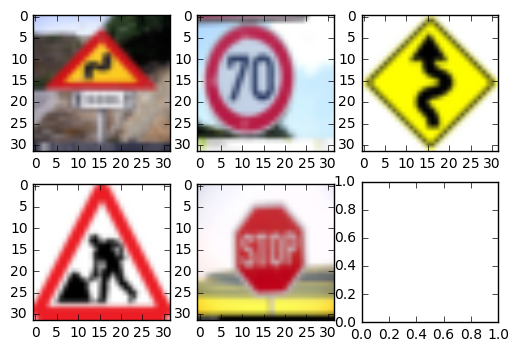

In [16]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import scipy
image1 = mpimg.imread("1.jpg")
image2 = mpimg.imread("2.jpg")
image3 = mpimg.imread("3.jpg")
image4 = mpimg.imread("4.jpg")
image5 = mpimg.imread("5.jpg")
image1 = scipy.misc.imresize(image1,(32,32,3))
image2 = scipy.misc.imresize(image2,(32,32,3))
image3 = scipy.misc.imresize(image3,(32,32,3))
image4 = scipy.misc.imresize(image4,(32,32,3))
image5 = scipy.misc.imresize(image5,(32,32,3))
image = np.stack((image1,image2,image3,image4,image5))


with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    prob = sess.run(tf.nn.softmax(logits),feed_dict={x: image, keep_prob_conv: 1., keep_prob_fc: 1.})
    #print("image prob: ", prob)
    value = sess.run(tf.nn.top_k(tf.constant(prob), k=1))
    print("image is found to be ", value)

fig, ax = plt.subplots(nrows=2,ncols=3)
plt.subplot(2,3,1)
plt.imshow(image1)
plt.subplot(2,3,2)
plt.imshow(image2)
plt.subplot(2,3,3)
plt.imshow(image2)
plt.subplot(2,3,2)
plt.imshow(image3)
plt.subplot(2,3,4)
plt.imshow(image4)
plt.subplot(2,3,5)
plt.imshow(image5)
plt.show()

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**2 out of 5 were predicted correctly

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**As shown above

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.